# Import needed package

In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load data from excel file

In [593]:
# Correct function to load an Excel file
questionnaire_data = pd.read_excel('questionnaire.xlsx')

In [594]:
questionnaire_data.head()

,Unnamed: 0,Time,Consent form,Consent form (Coded),"Please select the color ""Purple"" from the list below","How frequently do you shop online every month, if at all","How frequently do you shop online every month, if at all (Coded)",What do you usually shop online? You can select more than one option,"Clothes, shoes, accessories (Coded)",Electronics (Coded),...,What is your gender (Coded),Please select your age group:,Please select your age group: (Coded),What is the last level of education you have completed,What is the last level of education you have completed (Coded),In what locality do you live?,In what locality do you live? (Coded),What is your total monthly family/household income?,What is your total monthly family/household income? (Coded),Unnamed: 124
0,1.0,2023-06-10 14:01:24,I consent to taking this survey,1.0,purple,Up to once a month,2.0,Grocery & food delivery,NaN,NaN,...,1.0,51-55 years old,8,Masters and above,4,City with a population of one million or more ...,5,above 100 thousand rubles per person per month,4,NaN
1,2.0,2023-06-10 14:48:08,I consent to taking this survey,1.0,purple,Up to twice a month,3.0,"Hobby items , Furniture and home appliances , ...",NaN,NaN,...,1.0,51-55 years old,8,Masters and above,4,City with a population of one million or more ...,5,from 50 thousand rubles to 100 thousand rubles...,3,NaN
2,3.0,2023-07-10 12:57:06,I consent to taking this survey,1.0,purple,Up to once a month,2.0,Furniture and home appliances,NaN,NaN,...,1.0,51-55 years old,8,Masters and above,4,City with a population of one million or more ...,5,from 50 thousand rubles to 100 thousand rubles...,3,NaN
3,4.0,2023-07-10 13:17:46,I consent to taking this survey,1.0,purple,More than once a week,5.0,Grocery & food delivery,NaN,NaN,...,1.0,31-35 years old,4,Masters and above,4,City with a population of one million or more ...,5,from 50 thousand rubles to 100 thousand rubles...,3,NaN
4,5.0,2023-07-10 14:28:50,I consent to taking this survey,1.0,purple,More than once a week,5.0,"Clothes, shoes, accessories , Electronics , To...",1.0,2.0,...,2.0,31-35 years old,4,Masters and above,4,City with a population of one million or more ...,5,from 50 thousand rubles to 100 thousand rubles...,3,NaN


In [595]:
questionnaire_data.isnull().sum()

Unnamed: 0                                                       1
Time                                                             1
Consent form                                                     1
Consent form (Coded)                                             1
Please select the color "Purple" from the list below             1
                                                              ... 
In what locality do you live?                                    0
In what locality do you live? (Coded)                            0
What is your total monthly family/household income?              0
What is your total monthly family/household income? (Coded)      0
Unnamed: 124                                                   425
Length: 125, dtype: int64

In [596]:
questionnaire_data.dtypes

Unnamed: 0                                                     float64
Time                                                            object
Consent form                                                    object
Consent form (Coded)                                           float64
Please select the color "Purple" from the list below            object
                                                                ...   
In what locality do you live?                                   object
In what locality do you live? (Coded)                            int64
What is your total monthly family/household income?             object
What is your total monthly family/household income? (Coded)      int64
Unnamed: 124                                                   float64
Length: 125, dtype: object

In [597]:
for column in questionnaire_data.columns:
    print(column)

Unnamed: 0
Time
Consent form
Consent form (Coded)
Please select the color "Purple" from the list below
How frequently do you shop online every month, if at all
How frequently do you shop online every month, if at all (Coded)
What do you usually shop online? You can select more than one option
Clothes, shoes, accessories (Coded)
Electronics (Coded)
Toys (Coded)
Hobby items (Coded)
Furniture and home appliances (Coded)
Personal care (Coded)
Health care (Coded)
Grocery & food delivery (Coded)
Travel (Coded)
None of the above (Coded)
Other: Goods for pets (Coded)
Other: Books (Coded)
Other: Computer games (Coded)
Other: fertilizers (Coded)
Other: Car care products (Coded)
And what you usually shop online most frequently?
Clothes, shoes, accessories (Coded).1
Personal care (Coded).1
Grocery & food delivery (Coded).1
Other: Books (Coded).1
Other: Goods for pets (Coded).1
Other: Car care products (Coded).1
Other: dolls (Coded)
Other: Electronics (Coded)
Other: Excursions (Coded)
Other: fertil

# Check for Missing Values

In [599]:
# Checking for missing values in each column
missing_values = questionnaire_data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Unnamed: 0                                                       1
Time                                                             1
Consent form                                                     1
Consent form (Coded)                                             1
Please select the color "Purple" from the list below             1
                                                              ... 
In what locality do you live?                                    0
In what locality do you live? (Coded)                            0
What is your total monthly family/household income?              0
What is your total monthly family/household income? (Coded)      0
Unnamed: 124                                                   425
Length: 125, dtype: int64


# Basic descriptive statistics for all numeric columns

In [601]:
# Select only numeric columns for aggregation
numeric_data = questionnaire_data.select_dtypes(include=['number'])

# Basic summary statistics
summary_stats = numeric_data.describe()

# Additional statistics such as median, variance, skewness, and kurtosis
additional_stats = numeric_data.agg(['median', 'var', 'skew', 'kurtosis'])

# Combine the basic and additional statistics
complete_stats = pd.concat([summary_stats, additional_stats])

print(complete_stats)


            Unnamed: 0  Consent form (Coded)  \
count       425.000000            425.000000   
mean        213.000000              0.995294   
std         122.831185              0.068518   
min           1.000000              0.000000   
25%         107.000000              1.000000   
50%         213.000000              1.000000   
75%         319.000000              1.000000   
max         425.000000              1.000000   
median      213.000000              1.000000   
var       15087.500000              0.004695   
skew          0.000000            -14.525595   
kurtosis     -1.200000            209.981054   

          How frequently do you shop online every month, if at all (Coded)  \
count                                            425.000000                  
mean                                               3.550588                  
std                                                1.024652                  
min                                                2.000000    

# Analyze Demographic Information
Explore basic demographic distributions, like gender, age, education level, and income, which might influence shopping behavior.

In [603]:
print("\nDemographic Analysis:")

# Gender distribution
print("Gender Distribution:\n", questionnaire_data['What is your gender (Coded)'].value_counts())

# Age group distribution
print("Age Group Distribution:\n", questionnaire_data['Please select your age group: (Coded)'].value_counts())

# Education level distribution
print("Education Level Distribution:\n", questionnaire_data['What is the last level of education you have completed (Coded)'].value_counts())

# Income level distribution
print("Income Level Distribution:\n", questionnaire_data['What is your total monthly family/household income? (Coded)'].value_counts())


Demographic Analysis:
Gender Distribution:
 What is your gender (Coded)
1.0    282
2.0    140
3.0      3
Name: count, dtype: int64
Age Group Distribution:
 Please select your age group: (Coded)
2     271
1      49
3      21
8      17
4      15
5      15
7      12
9       9
6       9
10      7
0       1
Name: count, dtype: int64
Education Level Distribution:
 What is the last level of education you have completed (Coded)
3    241
2     85
4     61
5     19
1     19
0      1
Name: count, dtype: int64
Income Level Distribution:
 What is your total monthly family/household income? (Coded)
2    124
3    120
1    114
4     68
Name: count, dtype: int64


# Analyze Online Shopping Frequency
This step will show how often respondents shop online.

In [605]:
print("\nOnline Shopping Frequency Analysis:")
print(questionnaire_data['How frequently do you shop online every month, if at all (Coded)'].value_counts())


Online Shopping Frequency Analysis:
How frequently do you shop online every month, if at all (Coded)
3.0    130
4.0    125
5.0     93
2.0     77
Name: count, dtype: int64


# Analyze Popular Shopping Categories
To understand what respondents shop for, look at the count of responses across different product categories.

In [607]:
print("\nPopular Shopping Categories:")

# Specify the columns for shopping categories
categories = [
    'Clothes, shoes, accessories (Coded)', 'Electronics (Coded)', 'Toys (Coded)', 
    'Hobby items (Coded)', 'Furniture and home appliances (Coded)', 'Personal care (Coded)', 
    'Health care (Coded)', 'Grocery & food delivery (Coded)', 'Travel (Coded)'
]

# Sum up responses for each category
category_counts = questionnaire_data[categories].sum()
print(category_counts.sort_values(ascending=False))


Popular Shopping Categories:
Grocery & food delivery (Coded)          2144.0
Personal care (Coded)                    1560.0
Hobby items (Coded)                       720.0
Furniture and home appliances (Coded)     665.0
Health care (Coded)                       644.0
Travel (Coded)                            468.0
Clothes, shoes, accessories (Coded)       343.0
Electronics (Coded)                       232.0
Toys (Coded)                              168.0
dtype: float64


# Analyze Importance of Shopping Factors
Evaluate which factors (e.g., product availability, information quality) are most important to respondents when shopping online.

In [609]:
print("\nImportance of Factors in Online Shopping:")

# Specify columns related to importance of shopping factors
factors = [
    'When shopping online, how important are the following factors for you? The products\' availability (Coded)',
    'When shopping online, how important are the following factors for you?   [The information quality in the website or app ] (Coded)',
    'When shopping online, how important are the following factors for you?   [Availability of voice search ] (Coded)',
    'When shopping online, how important are the following factors for you?  Availability of augmented reality features (Coded)',
    'When shopping online, how important are the following factors for you? [Availability of chatbots ] (Coded)',
    'When shopping online, how important are the following factors for you? [Availability of virtual assistants ] (Coded)'
]

# Calculate the mean importance for each factor
factor_importance = questionnaire_data[factors].mean()
print(factor_importance.sort_values(ascending=False))


Importance of Factors in Online Shopping:
When shopping online, how important are the following factors for you?   [The information quality in the website or app ] (Coded)    5.423529
When shopping online, how important are the following factors for you? The products' availability (Coded)                            5.120000
When shopping online, how important are the following factors for you? [Availability of virtual assistants ] (Coded)                 3.835294
When shopping online, how important are the following factors for you? [Availability of chatbots ] (Coded)                           3.809412
When shopping online, how important are the following factors for you?  Availability of augmented reality features (Coded)           3.694118
When shopping online, how important are the following factors for you?   [Availability of voice search ] (Coded)                     3.527059
dtype: float64


# Analyze AI Tools Usage in Online Shopping
Examine how frequently respondents use different AI tools (like chatbots or virtual assistants) when shopping online.

In [611]:
print("\nAI Tools Usage:")

# Columns for different AI tools
ai_tools = [
    'Chatbot (Coded)', 'Virtual assistant (Coded)', 'Augmented reality (Coded)', 
    'Visual search (Coded)', 'Voice assistant (Coded)'
]

# Sum up usage for each AI tool
ai_tool_usage = questionnaire_data[ai_tools].sum()
print(ai_tool_usage.sort_values(ascending=False))


AI Tools Usage:
Voice assistant (Coded)      380.0
Virtual assistant (Coded)    260.0
Chatbot (Coded)              185.0
Augmented reality (Coded)    183.0
Visual search (Coded)          0.0
dtype: float64


# Import Visualization Libraries

In [613]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# Visualize Demographic Distributions
Gender Distribution

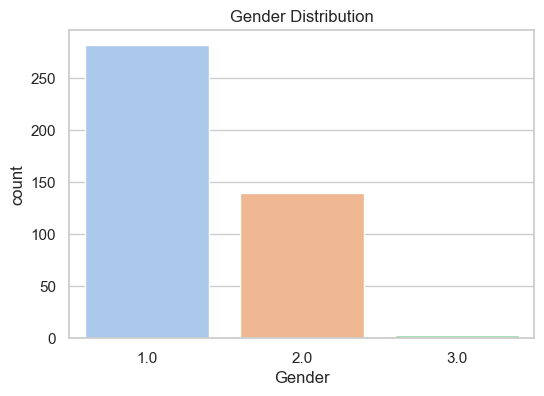

In [615]:
# Plot gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=questionnaire_data, x='What is your gender (Coded)', palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.show()

<p>Age Group Distribution</p>

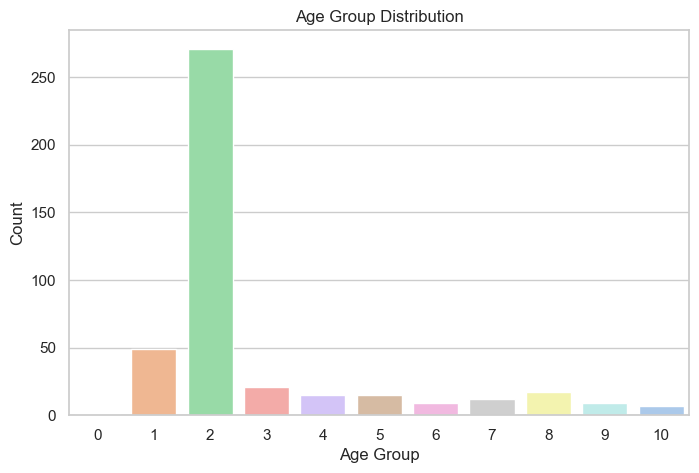

In [617]:
# Plot age group distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=questionnaire_data, x='Please select your age group: (Coded)', palette="pastel")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

<p>Visualize Online Shopping Frequency</p>

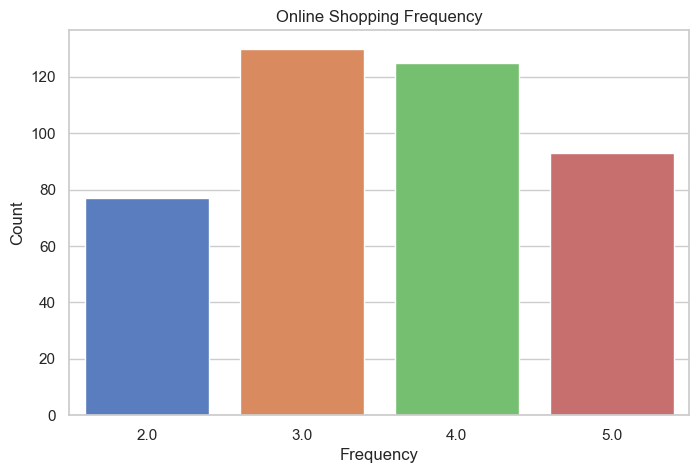

In [619]:
# Plot online shopping frequency
plt.figure(figsize=(8, 5))
sns.countplot(data=questionnaire_data, x='How frequently do you shop online every month, if at all (Coded)', palette="muted")
plt.title("Online Shopping Frequency")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()


# Popular Shopping Categories
Here, we visualize the popular shopping categories by plotting a bar chart.

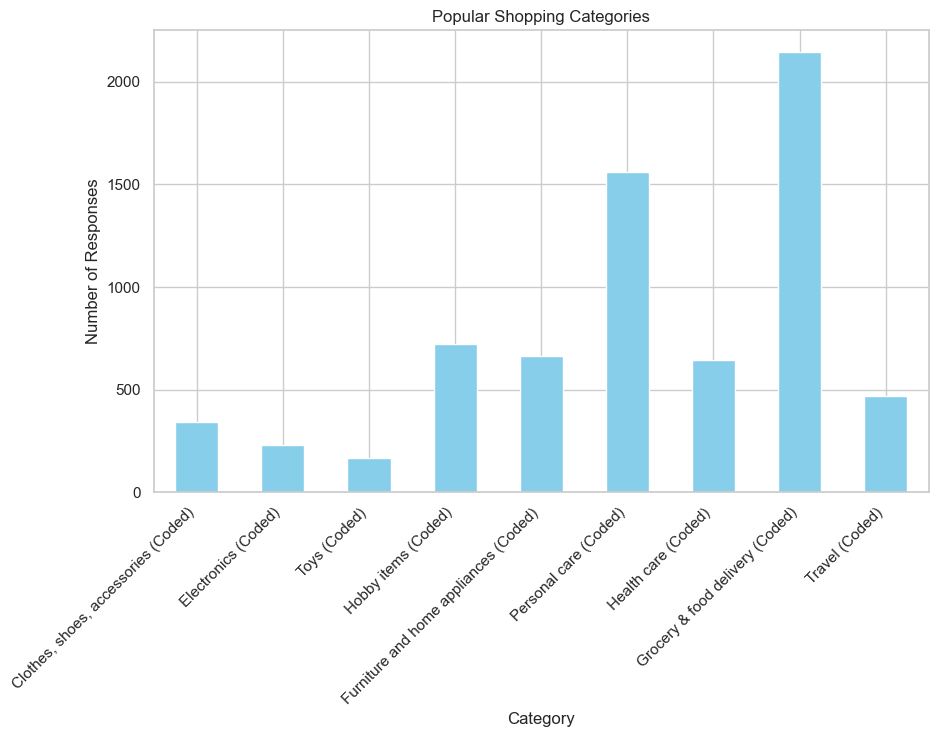

In [621]:
# Create a bar chart of shopping categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Popular Shopping Categories")
plt.xlabel("Category")
plt.ylabel("Number of Responses")
plt.xticks(rotation=45, ha="right")
plt.show()

# Importance of Online Shopping Factors
This visualization helps us see which factors are considered most important by respondents when shopping online.

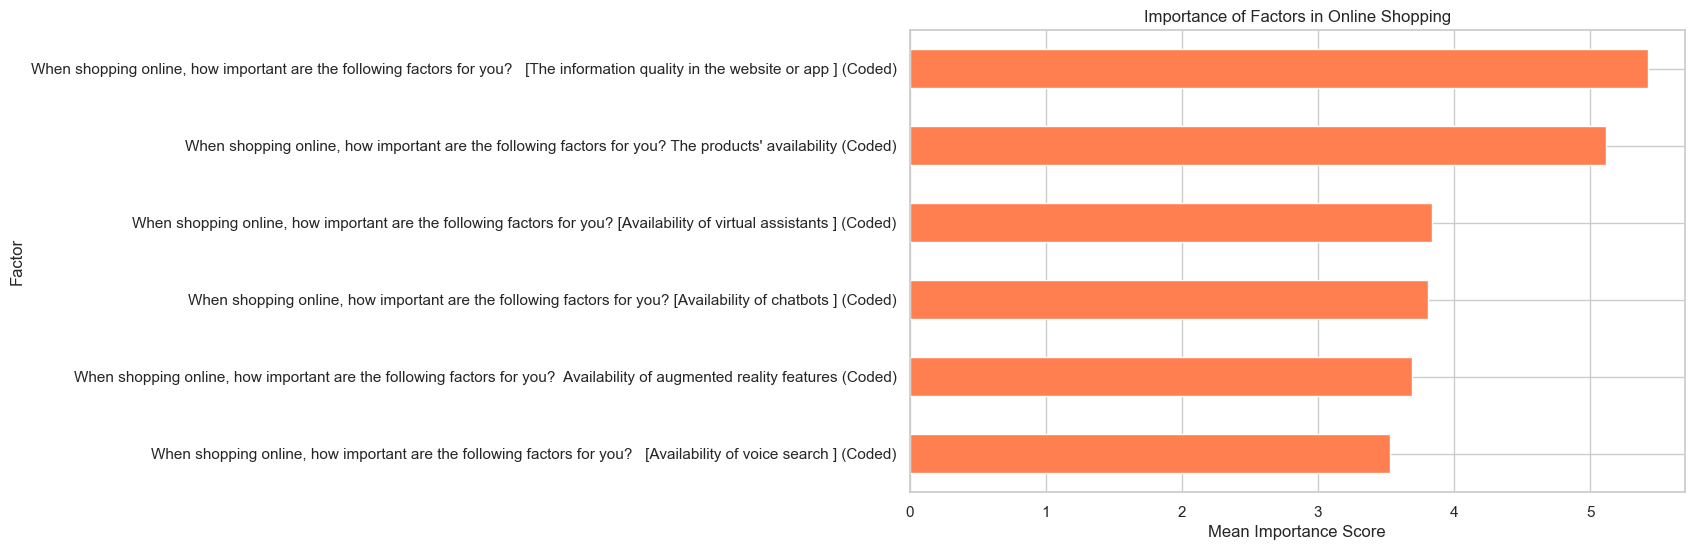

In [623]:
# Create a bar chart for importance of online shopping factors
plt.figure(figsize=(10, 6))
factor_importance.sort_values().plot(kind='barh', color='coral')
plt.title("Importance of Factors in Online Shopping")
plt.xlabel("Mean Importance Score")
plt.ylabel("Factor")
plt.show()

# AI Tools Usage in Online Shopping
This bar chart shows the usage frequency of different AI tools, helping us understand which tools are most popular.

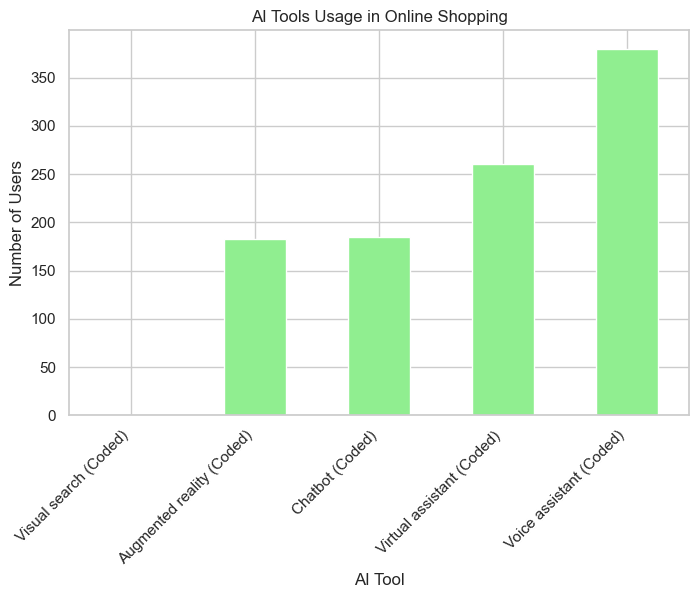

In [625]:
# Create a bar chart for AI tool usage
plt.figure(figsize=(8, 5))
ai_tool_usage.sort_values().plot(kind='bar', color='lightgreen')
plt.title("AI Tools Usage in Online Shopping")
plt.xlabel("AI Tool")
plt.ylabel("Number of Users")
plt.xticks(rotation=45, ha="right")
plt.show()


# Hypothesis 1

Null Hypothesis (H₀): Usefulness of AI tools' recommendations is not related to the usage of Virtual Assistant.

Alternative Hypothesis (H₁): Usefulness of AI tools' recommendations is related to the usage of Virtual Assistant.

# Create the Contingency Table

In [629]:
import pandas as pd
from scipy.stats import chi2_contingency

In [630]:
usefulness_column = [col for col in questionnaire_data.columns if 'useful' in col.lower() and 'recommendations' in col.lower()][0]
virtual_assistant_column = [col for col in questionnaire_data.columns if 'virtual assistant' in col.lower()][0]

# Generate the contingency table
contingency_table = pd.crosstab(
    questionnaire_data[usefulness_column], 
    questionnaire_data[virtual_assistant_column]
)
print("Contingency Table:")
print(contingency_table)

Contingency Table:
When shopping online, how important are the following factors for you? [Availability of virtual assistants ]  I do not know  \
Thinking about AI tools, please see the followi...                                                                            
Neither agree nor disagree                                                                                                1   
Somewhat agree                                                                                                            6   
Somewhat disagree                                                                                                         3   
Strongly agree                                                                                                            1   
Strongly disagree                                                                                                         2   

When shopping online, how important are the following factors for you? [Availability of vir

# Run the Chi-Square Test
Use chi2_contingency to perform the test on the contingency table.

In [632]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Statistic: 45.44906897688176
p-value: 0.0009587425594770821
Degrees of Freedom: 20
Expected Frequencies Table:
[[ 2.41428571 23.21428571  0.37142857 16.71428571 30.82857143  4.45714286]
 [ 5.85       56.25        0.9        40.5        74.7        10.8       ]
 [ 2.38333333 22.91666667  0.36666667 16.5        30.43333333  4.4       ]
 [ 1.20714286 11.60714286  0.18571429  8.35714286 15.41428571  2.22857143]
 [ 1.1452381  11.01190476  0.17619048  7.92857143 14.62380952  2.11428571]]


# Interpret the Results

<h4>If p < 0.05: Reject the null hypothesis, indicating a significant relationship between the usefulness of AI recommendations and Virtual Assistant usage.</h4>
    
<h4>If p ≥ 0.05: Fail to reject the null hypothesis, indicating no significant relationship between the two variables.</h4>

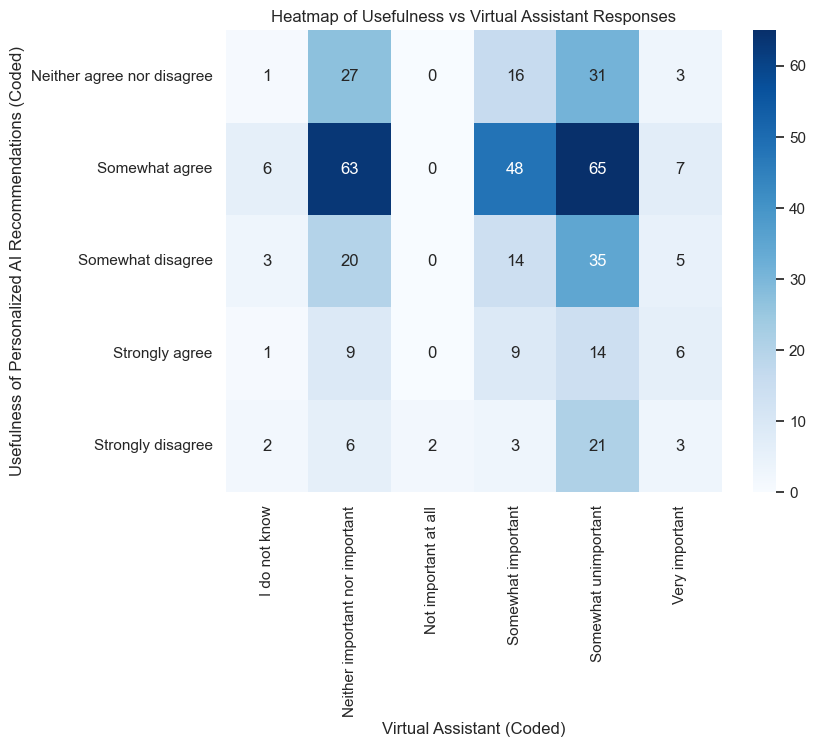


The relationship is statistically significant.


In [635]:
# Plot the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title("Heatmap of Usefulness vs Virtual Assistant Responses")
plt.xlabel("Virtual Assistant (Coded)")
plt.ylabel("Usefulness of Personalized AI Recommendations (Coded)")
plt.show()

# Relationship Statistics
if p < 0.05:
    print("\nThe relationship is statistically significant.")
else:
    print("\nNo statistically significant relationship.")

# Hypothesis 2

Ho: Usefulness of AI tools recommendations is not related to the usage of SA

 Ho: Usefulness of AI tools recommendations is related to the usage of SA

The typical significance level is 0.05 (5%).

In [639]:
questionnaire_data.columns = questionnaire_data.columns.str.strip()


Contingency Table:
Which of the following AI tools for online retail have you ever used, if any?  Augmented reality  \
Thinking about AI tools, please see the followi...                                                 
0.0                                                                                            1   
1.0                                                                                            0   
2.0                                                                                            2   
3.0                                                                                            2   
4.0                                                                                            1   
5.0                                                                                            1   

Which of the following AI tools for online retail have you ever used, if any?  Augmented reality , None of the above  \
Thinking about AI tools, please see the followi...          

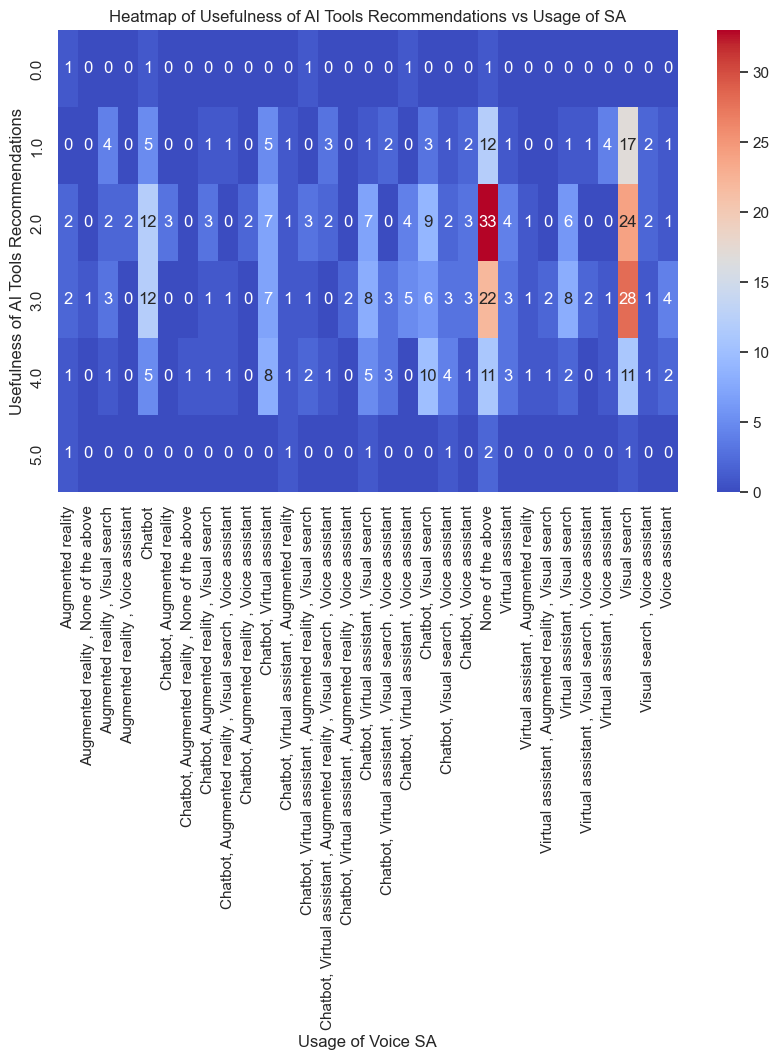


We fail to reject the null hypothesis. Usefulness of AI tools recommendations is not related to the usage of voice assistants.
The analysis suggests no statistically significant association between the usefulness of AI tool recommendations and the usage of voice assistants.


In [640]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Replace these column names with your actual dataset's column names
usefulness_column = 'Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I’m likely to buy the goods or services recommended by AI tools. ] (Coded)'  # Replace with the actual column name
sa_assistant_column = 'Which of the following AI tools for online retail have you ever used, if any?'

# Step 1: Generate the contingency table
contingency_table = pd.crosstab(questionnaire_data[usefulness_column], questionnaire_data[sa_assistant_column])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the test results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Step 3: Plot the contingency table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Heatmap of Usefulness of AI Tools Recommendations vs Usage of SA")
plt.xlabel("Usage of Voice SA")
plt.ylabel("Usefulness of AI Tools Recommendations")
plt.show()

# Step 4: Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. Usefulness of AI tools recommendations is related to the usage of voice assistants.")
else:
    print("\nWe fail to reject the null hypothesis. Usefulness of AI tools recommendations is not related to the usage of voice assistants.")

# Additional Insights
if p_value < alpha:
    print("The analysis suggests a statistically significant association between the usefulness of AI tool recommendations and the usage of voice assistants.")
else:
    print("The analysis suggests no statistically significant association between the usefulness of AI tool recommendations and the usage of voice assistants.")


<h3>Interpretation:</h3>

<p>Chi-Square Statistic: Measures how much the observed frequencies deviate from the expected frequencies under the null hypothesis.
P-Value: Tells you if the observed results are statistically significant. If the p-value is less than 0.05, you reject the null hypothesis and conclude that the two variables are related.</p>

<p>Degrees of Freedom (dof): Helps in determining the appropriate distribution to use for the test.
Expected Frequencies: The expected frequencies under the null hypothesis (no relationship).</p>

<h3>Decision:</h3>
If p_value < 0.05, reject the null hypothesis and conclude that the usefulness of AI tools recommendations is related to the usage of a virtual assistant.
    
If p_value ≥ 0.05, fail to reject the null hypothesis, indicating no significant relationship.

# Hypothesis 3

Null Hypothesis (H₀): The usefulness of AI tool recommendations is not related to the usage of chatbots. In other words, the two variables are independent.

Alternative(H₀):The usefulness of AI tool recommendations is related to the usage of chatbots. In other words, the two variables are dependent.

In [644]:
import pandas as pd
from scipy import stats


# Replace with the correct column names identified
usefulness_column = 'Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I find it useful when I get personalized recommendations from AI tools ]'  # Replace with actual column name
chatbot_column = 'Think about your experience of online shopping and chatbots, and tell us to what extent do you agree or disagree with the statement below.[I am satisfied with the assistance from Chatbot during my online shopping ]'  # Replace with actual column name

# Generate the contingency table for the two variables
contingency_table = pd.crosstab(questionnaire_data[usefulness_column], questionnaire_data[chatbot_column])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the test results
print("\nChi-Square Test Results:")
print(f"Chi2 Stat: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. The usefulness of AI tools recommendations is related to the usage of chatbots.")
else:
    print("\nWe fail to reject the null hypothesis. The usefulness of AI tools recommendations is not related to the usage of chatbots.")


Contingency Table:
Think about your experience of online shopping and chatbots, and tell us to what extent do you agree or disagree with the statement below.[I am satisfied with the assistance from Chatbot during my online shopping ]  Neither agree nor disagree  \
Thinking about AI tools, please see the followi...                                                                                                                                                                                                   
Neither agree nor disagree                                                                                                                                                                                                                      33   
Somewhat agree                                                                                                                                                                                                                                  65 

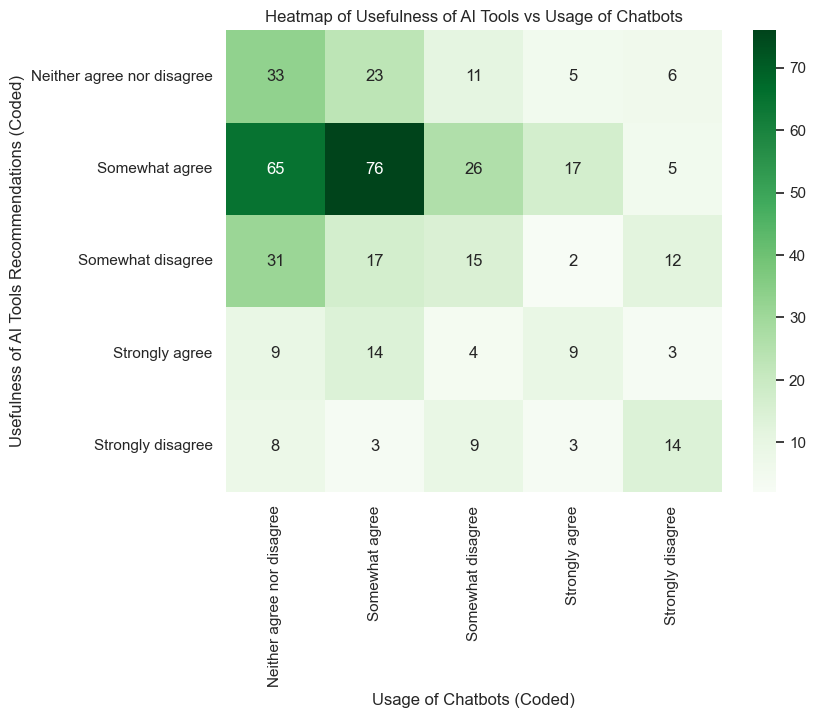


We reject the null hypothesis. The usefulness of AI tools recommendations is related to the usage of chatbots.
The analysis suggests a statistically significant association between the two variables.


In [645]:
# Plot the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Greens')
plt.title("Heatmap of Usefulness of AI Tools vs Usage of Chatbots")
plt.xlabel("Usage of Chatbots (Coded)")
plt.ylabel("Usefulness of AI Tools Recommendations (Coded)")
plt.show()

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. The usefulness of AI tools recommendations is related to the usage of chatbots.")
else:
    print("\nWe fail to reject the null hypothesis. The usefulness of AI tools recommendations is not related to the usage of chatbots.")

# Additional Insights: Print summary statement
if p_value < alpha:
    print("The analysis suggests a statistically significant association between the two variables.")
else:
    print("The analysis suggests no statistically significant association between the two variables.")

# Hypothesis 4

Null Hypothesis (H0): Unplanned purchases are not triggered by AI shopping tools.

Alternative Hypothesis (H1): Unplanned purchases are triggered by AI shopping tools.

In [648]:


# Example column names, replace these with your actual column names
ai_shopping_column = 'Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I’m interested to buy the goods or services recommended by AI tools]'  # Column indicating if AI shopping tools were used
unplanned_column = 'Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I’m likely to buy unplanned goods or services when shopping online supported by AI tools]'  # Column indicating if unplanned purchases occurred

# Generate the contingency table for the two variables
contingency_table = pd.crosstab(questionnaire_data[ai_shopping_column], questionnaire_data[unplanned_column])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the test results
print("\nChi-Square Test Results:")
print(f"Chi2 Stat: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. Unplanned purchases are triggered by AI shopping tools.")
else:
    print("\nWe fail to reject the null hypothesis. Unplanned purchases are not triggered by AI shopping tools.")


Contingency Table:
Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I’m likely to buy unplanned goods or services when shopping online supported by AI tools]  Neither agree nor disagree  \
Thinking about AI tools, please see the followi...                                                                                                                                                                                                         
Neither agree nor disagree                                                                                                                                                                                                                            56   
Somewhat agree                                                                                                                                                                                                                   

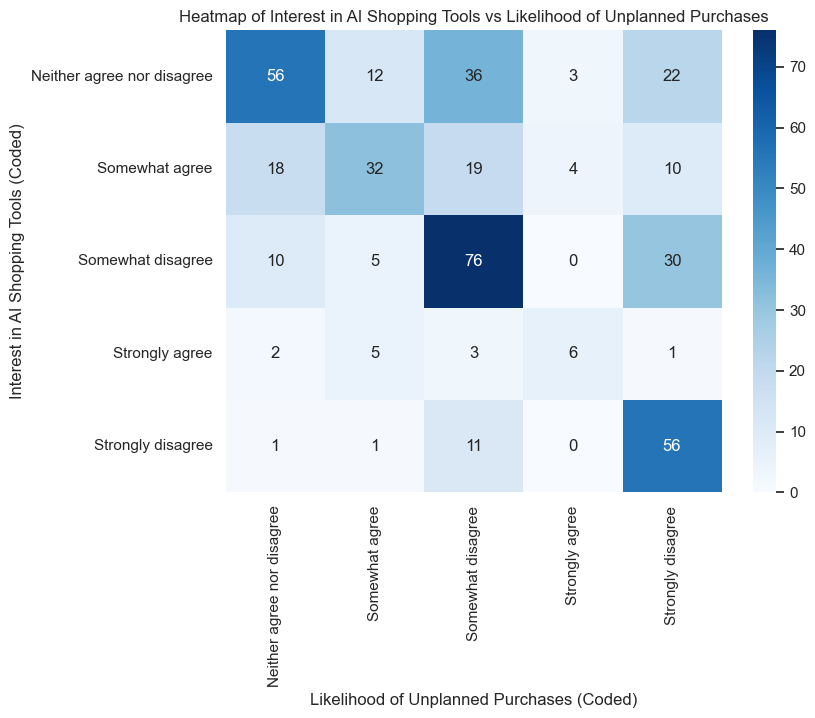


We reject the null hypothesis. Unplanned purchases are triggered by AI shopping tools.
The analysis suggests a statistically significant association between AI shopping tools and unplanned purchases.


In [649]:
# Plot the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title("Heatmap of Interest in AI Shopping Tools vs Likelihood of Unplanned Purchases")
plt.xlabel("Likelihood of Unplanned Purchases (Coded)")
plt.ylabel("Interest in AI Shopping Tools (Coded)")
plt.show()

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. Unplanned purchases are triggered by AI shopping tools.")
else:
    print("\nWe fail to reject the null hypothesis. Unplanned purchases are not triggered by AI shopping tools.")

# Additional Insights: Print summary statement
if p_value < alpha:
    print("The analysis suggests a statistically significant association between AI shopping tools and unplanned purchases.")
else:
    print("The analysis suggests no statistically significant association between AI shopping tools and unplanned purchases.")

# Hypothesis 5

Null Hypothesis (H0): There is no significant difference between males and females in the types of products they frequently purchase using AI tools.

Alternative Hypothesis (H1): Males and females differ significantly in the types of products they frequently purchase using AI tools.

In [652]:

# Example column names, replace these with your actual column names
gender_column = 'What is your gender'  # Column indicating the gender (Male/Female)
product_category_column = 'And what you usually shop online most frequently?'  # Column indicating product category purchased (e.g., Electronics, Clothing)

# Generate the contingency table for Gender and Product Categories
contingency_table = pd.crosstab(questionnaire_data[gender_column], questionnaire_data[product_category_column])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the test results
print("\nChi-Square Test Results:")
print(f"Chi2 Stat: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. Males and females differ significantly in the types of products they frequently purchase using AI tools.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant difference between males and females in the types of products they frequently purchase using AI tools.")


Contingency Table:
And what you usually shop online most frequently?  Accessories  Books  \
What is your gender                                                     
Female                                                       0      2   
Male                                                         1      0   
Prefer not to say                                            0      0   

And what you usually shop online most frequently?  Books Goods for pets  \
What is your gender                                                       
Female                                                                1   
Male                                                                  0   
Prefer not to say                                                     0   

And what you usually shop online most frequently?  Car care products  \
What is your gender                                                    
Female                                                             0   
Male                   

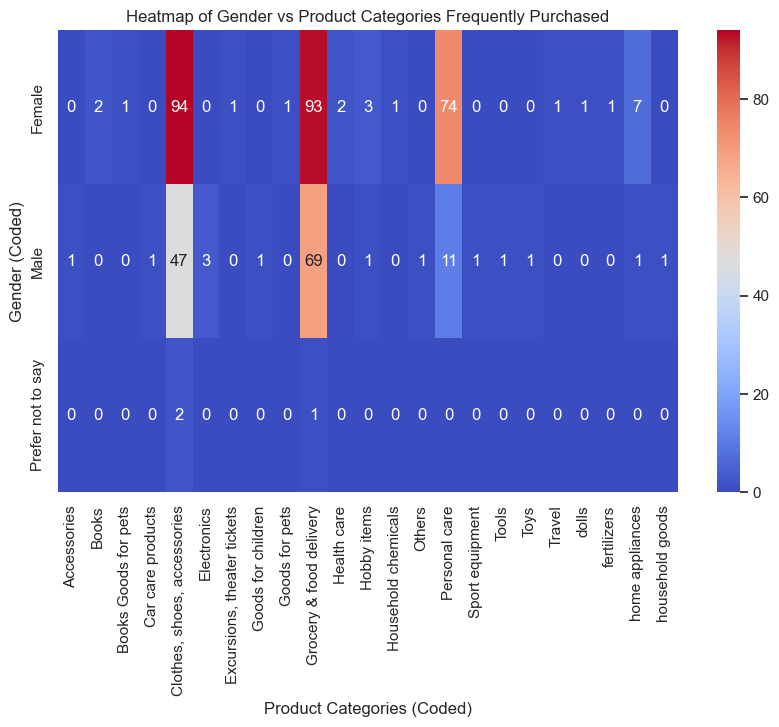


We fail to reject the null hypothesis. There is no significant difference between males and females in the types of products they frequently purchase using AI tools.
The analysis suggests no statistically significant association between gender and product categories purchased.


In [653]:
# Plot the contingency table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Heatmap of Gender vs Product Categories Frequently Purchased")
plt.xlabel("Product Categories (Coded)")
plt.ylabel("Gender (Coded)")
plt.show()

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. Males and females differ significantly in the types of products they frequently purchase using AI tools.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant difference between males and females in the types of products they frequently purchase using AI tools.")

# Additional Insights: Print summary statement
if p_value < alpha:
    print("The analysis suggests a statistically significant association between gender and product categories purchased.")
else:
    print("The analysis suggests no statistically significant association between gender and product categories purchased.")

# Hypothesis 6

Ho: The likelihood of recommending the use of AI tools in online shopping is not related to loyalty to AI-powered platform

H1: The likelihood of recommending the use of AI tools in online shopping is related to loyalty to AI-powered platforms



Contingency Table (Recommendation vs. Loyalty):
Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I consider myself loyal to AI-powered platforms ]  Neither agree nor disagree  \
Thinking about AI tools, please see the followi...                                                                                                                                                                 
Neither agree nor disagree                                                                                                                                                                                    57   
Somewhat agree                                                                                                                                                                                                18   
Somewhat disagree                                                                                      

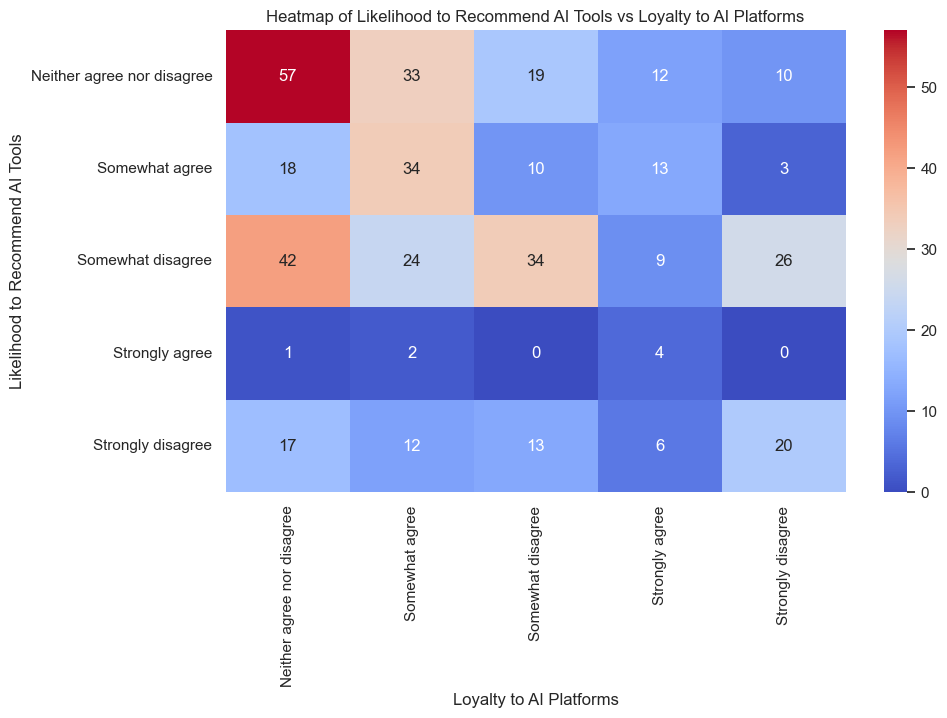


We reject the null hypothesis. The likelihood of recommending the use of AI tools is related to loyalty to AI-powered platforms.
The analysis suggests a statistically significant association between recommending AI tools and loyalty to AI platforms.


In [656]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Replace these column names with your actual dataset column names
recommendation_column = 'Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I’m likely to buy the goods or services recommended by AI tools. ]'  # Coded or categorized variable for recommendation
loyalty_column = 'Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I consider myself loyal to AI-powered platforms ]'  # Coded or categorized variable for loyalty to AI platforms

# Step 1: Generate the contingency table if both variables are categorical
contingency_table = pd.crosstab(questionnaire_data[recommendation_column], questionnaire_data[loyalty_column])

# Display the contingency table
print("\nContingency Table (Recommendation vs. Loyalty):")
print(contingency_table)

# Step 2: Perform the Chi-Square Test of Independence
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# Display the test results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_value_chi2}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Step 3: Plot the contingency table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Heatmap of Likelihood to Recommend AI Tools vs Loyalty to AI Platforms")
plt.xlabel("Loyalty to AI Platforms")
plt.ylabel("Likelihood to Recommend AI Tools")
plt.show()

# Step 4: Interpretation of the Chi-Square Test
alpha = 0.05
if p_value_chi2 < alpha:
    print("\nWe reject the null hypothesis. The likelihood of recommending the use of AI tools is related to loyalty to AI-powered platforms.")
else:
    print("\nWe fail to reject the null hypothesis. The likelihood of recommending the use of AI tools is not related to loyalty to AI-powered platforms.")

# Additional Insights: Print summary statement
if p_value_chi2 < alpha:
    print("The analysis suggests a statistically significant association between recommending AI tools and loyalty to AI platforms.")
else:
    print("The analysis suggests no statistically significant association between recommending AI tools and loyalty to AI platforms.")


# Hypothesis 7

Ho: Easing of shopping online by AI tools is not related to the likelihood of recommending AI tools in online shopping

H1: Easing of shopping online by AI tools is related to the likelihood of recommending AI tools in online shopping

Contingency Table:
Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I’m likely to buy the goods or services recommended by AI tools. ] (Coded)  0.0  \
Thinking about AI tools, please see the followi...                                                                                                                                                                   
1.0                                                                                                                                                                                                              2   
2.0                                                                                                                                                                                                              0   
3.0                                                                                                                          

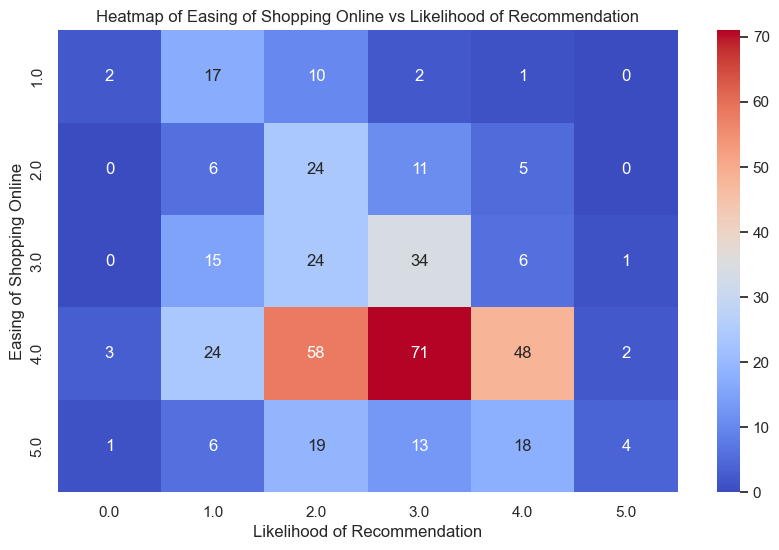


We reject the null hypothesis. Easing of shopping online by AI tools is related to the likelihood of recommending AI tools.
The analysis suggests a statistically significant association between the ease of shopping online and the likelihood of recommending AI tools.


In [659]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Replace these column names with your actual dataset's column names
easing_column = 'Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:Shopping apps and websites are easy to use if supported by AI tools] (Coded)'  # Replace with your actual column name
recommendation_column = 'Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I’m likely to buy the goods or services recommended by AI tools. ] (Coded)'  # Replace with your actual column name

# Step 1: Generate the contingency table
contingency_table = pd.crosstab(questionnaire_data[easing_column], questionnaire_data[recommendation_column])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the test results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Step 3: Plot the contingency table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title("Heatmap of Easing of Shopping Online vs Likelihood of Recommendation")
plt.xlabel("Likelihood of Recommendation")
plt.ylabel("Easing of Shopping Online")
plt.show()

# Step 4: Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. Easing of shopping online by AI tools is related to the likelihood of recommending AI tools.")
else:
    print("\nWe fail to reject the null hypothesis. Easing of shopping online by AI tools is not related to the likelihood of recommending AI tools.")

# Additional Insights
if p_value < alpha:
    print("The analysis suggests a statistically significant association between the ease of shopping online and the likelihood of recommending AI tools.")
else:
    print("The analysis suggests no statistically significant association between the ease of shopping online and the likelihood of recommending AI tools.")


# Conceptual Model

<ol>
    <li><strong>Gender → Product Category Preference</strong><br>
        <em>Hypothesis:</em> Gender influences preferences for certain product categories when using AI tools.
    </li>
    <li><strong>Age → Ease of Use of AI Shopping Sites</strong><br>
        <em>Hypothesis:</em> Younger users find AI-powered shopping websites easier to use than older users.
    </li>
    <li><strong>Satisfaction Level → User Experience</strong><br>
        <em>Hypothesis:</em> Higher satisfaction levels correlate with a better user experience (e.g., rating above 4.0).
    </li>
    <li><strong>Frequency of AI Shopping Tool Use → Monthly Use of AI</strong><br>
        <em>Hypothesis:</em> Users who use AI shopping tools more frequently tend to engage with them more than 50% of the time each month.
    </li>
    <li><strong>Gender → Frequency of AI Shopping Tool Use</strong><br>
        <em>Hypothesis:</em> Gender affects how often users engage with AI shopping tools.
    </li>
    <li><strong>Age → Product Category Preference</strong><br>
        <em>Hypothesis:</em> Age influences which product categories users prefer when shopping via AI.
    </li>
    <li><strong>Satisfaction Level → Frequency of AI Shopping Tool Use</strong><br>
        <em>Hypothesis:</em> Users who are more satisfied with AI shopping tools tend to use them more frequently.
    </li>
</ol>

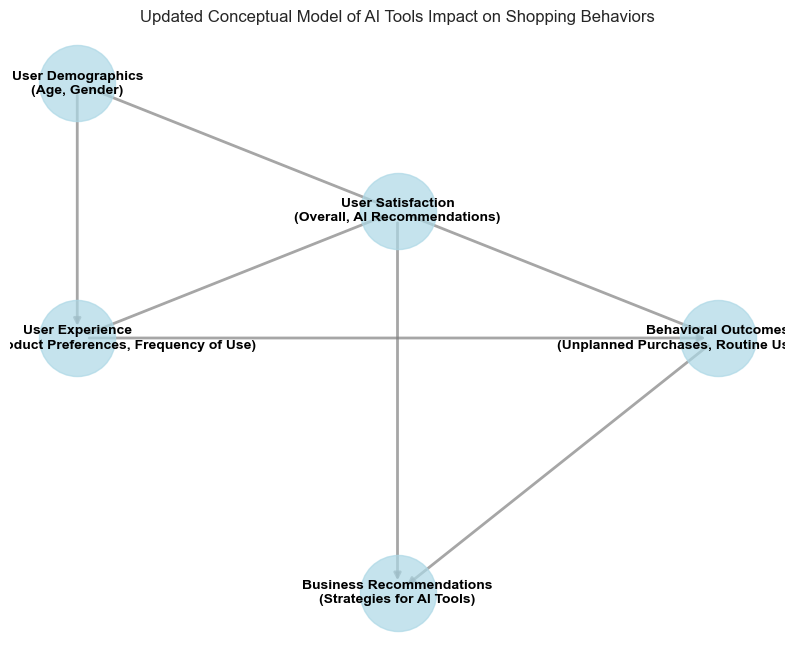

In [662]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each element in the updated conceptual model
nodes = [
    "User Demographics\n(Age, Gender)",
    "User Experience\n(Ease of Use, Product Preferences, Frequency of Use)",
    "User Satisfaction\n(Overall, AI Recommendations)",
    "Behavioral Outcomes\n(Unplanned Purchases, Routine Usage Patterns)",
    "Business Recommendations\n(Strategies for AI Tools)"
]

G.add_nodes_from(nodes)

# Add edges to represent relationships between elements
edges = [
    ("User Demographics\n(Age, Gender)", "User Experience\n(Ease of Use, Product Preferences, Frequency of Use)"),
    ("User Demographics\n(Age, Gender)", "User Satisfaction\n(Overall, AI Recommendations)"),
    ("User Experience\n(Ease of Use, Product Preferences, Frequency of Use)", "User Satisfaction\n(Overall, AI Recommendations)"),
    ("User Experience\n(Ease of Use, Product Preferences, Frequency of Use)", "Behavioral Outcomes\n(Unplanned Purchases, Routine Usage Patterns)"),
    ("User Satisfaction\n(Overall, AI Recommendations)", "Behavioral Outcomes\n(Unplanned Purchases, Routine Usage Patterns)"),
    ("User Satisfaction\n(Overall, AI Recommendations)", "Business Recommendations\n(Strategies for AI Tools)"),
    ("Behavioral Outcomes\n(Unplanned Purchases, Routine Usage Patterns)", "Business Recommendations\n(Strategies for AI Tools)")
]

G.add_edges_from(edges)

# Define positions for the nodes in the graph for a clearer layout
pos = {
    "User Demographics\n(Age, Gender)": (0, 0),
    "User Experience\n(Ease of Use, Product Preferences, Frequency of Use)": (0, -2),
    "User Satisfaction\n(Overall, AI Recommendations)": (2, -1),
    "Behavioral Outcomes\n(Unplanned Purchases, Routine Usage Patterns)": (4, -2),
    "Business Recommendations\n(Strategies for AI Tools)": (2, -4)
}

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=0.7, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", font_color="black")

# Show the plot
plt.title("Updated Conceptual Model of AI Tools Impact on Shopping Behaviors")
plt.axis("off")
plt.show()
